## Numerical EDA 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
This dataset from UCI Machine Learning is available on Kaggle: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

Research dating back to the 1960s has explored prevelance of diabetes and obseity amongst Pima Indians because they are considered "a living example of such a transition from a traditional lifestyle with limited food supply and high physical activity to a modern, sedentary lifestyle with a consistent food supply. ("High Risk Populations: The Pimas of Arizona and Mexico" in Curr Obes Rep. 2015 Mar 1; 4(1): 92–98.
Published online 2015 Jan 21. doi: 10.1007/s13679-014-0132-9 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# adjusts style to emulate ggplot 
# a popular plotting package for R
plt.style.use('ggplot')
import seaborn as sns
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

In [2]:
# read the dataset into a DataFrame
# currently the columns just have assigned indices
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This is a binary classification problem. The target variable is Outcome of whether or not a person has diabetes. 1 means the woman has diabetes. 0 means she doesn't.

In [4]:
# learn about dimensions of the DataFrame
# and data types of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The DataFrame has a total of 768 rows and 9 columns. Currently all of the columns are numerical. BMI and Diabetes Pedigree Funciton are float64 and the rest are int64. At first glance, the dataset doesn't have missing values that have been marked as NaNs. There are 8 predictor variables or features.

The attributes in this dataset are:
+ **Pregnancies**: number of pregnancies 
+ **Glucose**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test.
+ **BloodPressure**: Diastolic blood pressure (mm Hg)
+ **SkinThickness**: Triceps skin fold thickness (mm)
+ **Insulin**: 2-Hour serum insulin (mu U/ml)
+ **BMI**: Body mass index (weight in kg/(height in m)^2)
+ **DiabetesPedigreeFunction**: Diabetes pedigree function
+ **Age**: Age(years)

+ We will explore ***number of pregnancies*** as a predictor for whether a woman has diabetes or not. Ningjian Wang MD, PhD says, "Prior studies on the association between pregnancy and risk for diabetes in women have reported discordant results." ("Multiple pregnancies increase diabetes risk in postmenopausal women", ***Endocrine Today***, May 15, 2019. 
+ The ***oral glucose tolerance*** test measures a body's response to sugar. It can be used to screen for Type 2 diabetes or gestational diabetes.
+ Johns Hopkins says that ***high blood pressure*** is twice as likely to strike a person with diabetes than a person without diabetes, but the relationship between high blood pressure and diabetes isn't fully understood. https://www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/diabetes-and-high-blood-pressure
+ ***Tricep skin fold thickness*** is used to estimate body fat. Obesity is a known risk factor for diabetes, but research suggests that body fat distribution is also linked to diabetes. https://www.webmd.com/diabetes/news/20030214/body-fat-distribution-linked-to-diabetes
+ The ***2-hour serum insulin test*** measures the amount of insulin in a person's blood. Insulin is a hormone that helps move glucose from a person's bloodstream into their cells. 
+ ***BMI:*** obesity is a risk factor for type 2 diabetes. 
+ ***Diabetes Pedigree Function***: it is unclear how well this function predicts the onset of diabetes based on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gives an idea of the hereditary risk someone might have with the onset of diabetes mellitus. https://machinelearningmastery.com/case-study-predicting-the-onset-of-diabetes-within-five-years-part-1-of-3/
+ ***Age***: all women must be over the age of 21. 

In [5]:
# see basic statistics of columns 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# check the balance of the target variable diabetes outcome
counts = df['Outcome'].value_counts().to_dict()
print(counts)

{0: 500, 1: 268}


There is class imbalance with a larger number of women not having diabetes (500 count) than having diabetes (268 count). 

## Missing Values 

At first glance, it looked like there weren't missing values, but we can see that Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI have 0 min values that are not possible measurements. There might have been an error with entering these values, or missing values in the dataset were encoded with 0's. 

## Visual EDA

For each numeric factor, use a box-plot, scatter plot, histogram, or KDE plot to describe the distribution of the data as appropriate. The data types looked appropriate so it wasn't necessary to do any data type munging. 

In [7]:
cols = list(df)

In [8]:
# boxplot plotting function 
def boxplot(x, df):
    sns.boxplot( x=df[x], width=0.3);
    plt.title(x, fontsize=18)
    plt.show();

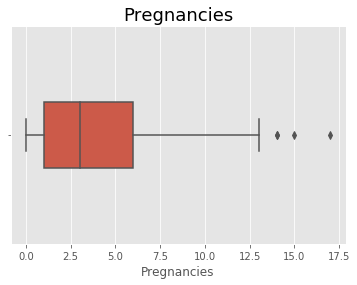

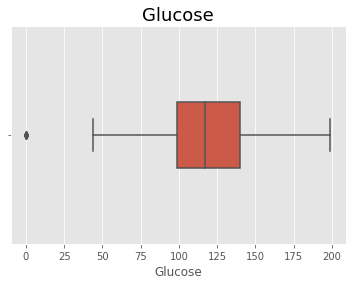

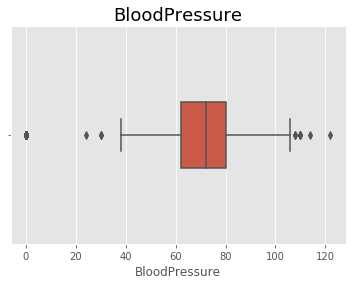

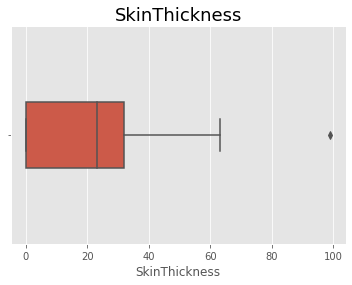

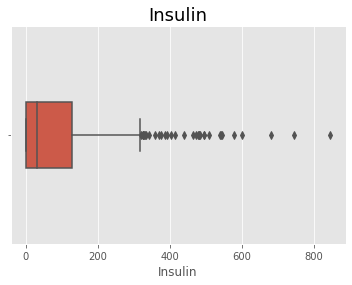

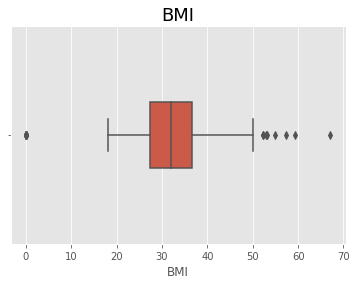

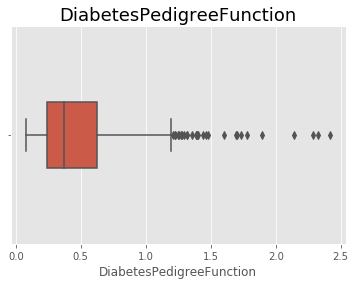

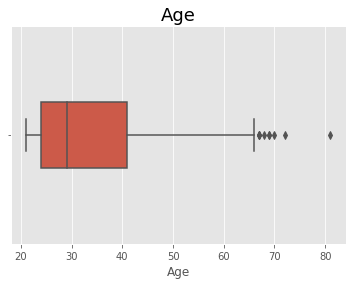

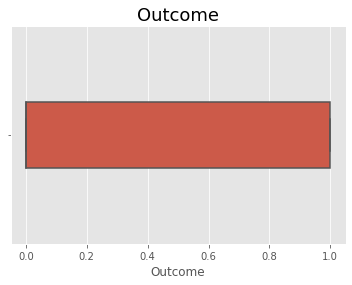

In [9]:
# create a boxplot of numeric columns in the dataset 
for i in range(len(cols)):
    boxplot(cols[i], df)

In [10]:
# histogram plotting function with KDE overlay 
# plot mean as a red line 
def hist_plot(x, df):
    sns.distplot(df[x], color='blue')
    plt.title(x, fontsize=18)
    plt.xlabel(x, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    mean = df[x].mean()
    plt.axvline(mean,color='green');
    plt.show();

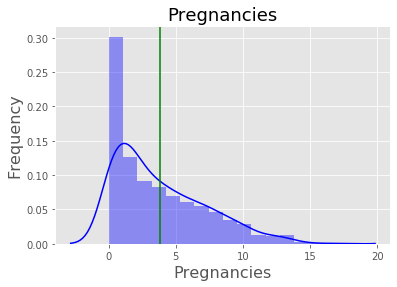

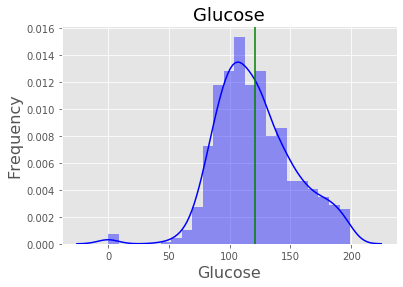

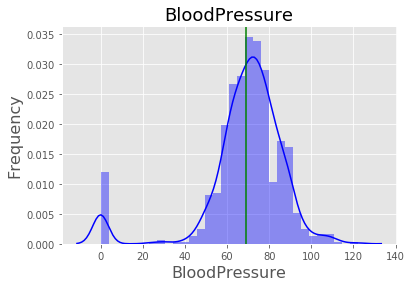

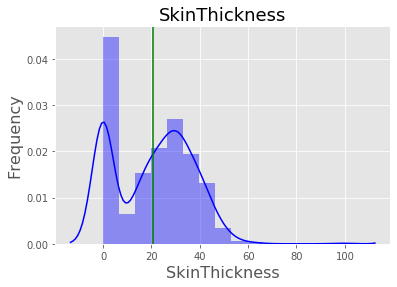

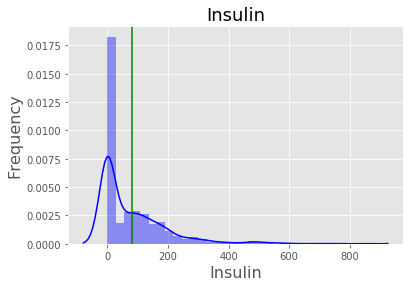

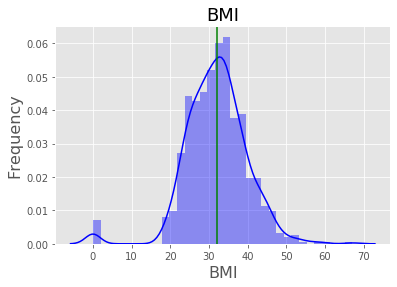

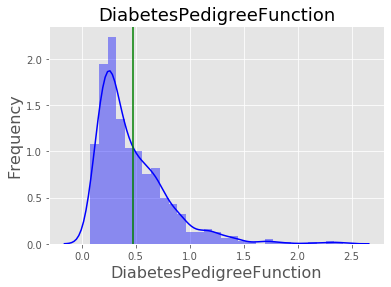

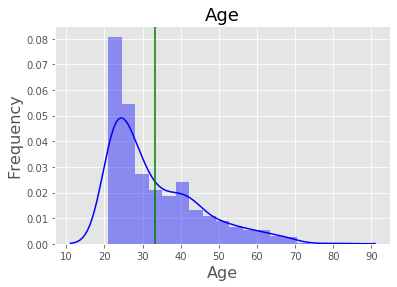

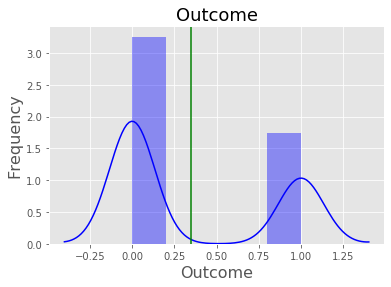

In [11]:
for i in range(len(cols)):
    hist_plot(cols[i], df)

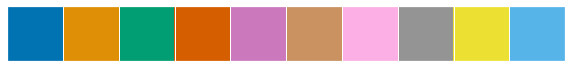

In [12]:
sns.set()
sns.palplot(sns.color_palette("colorblind"))

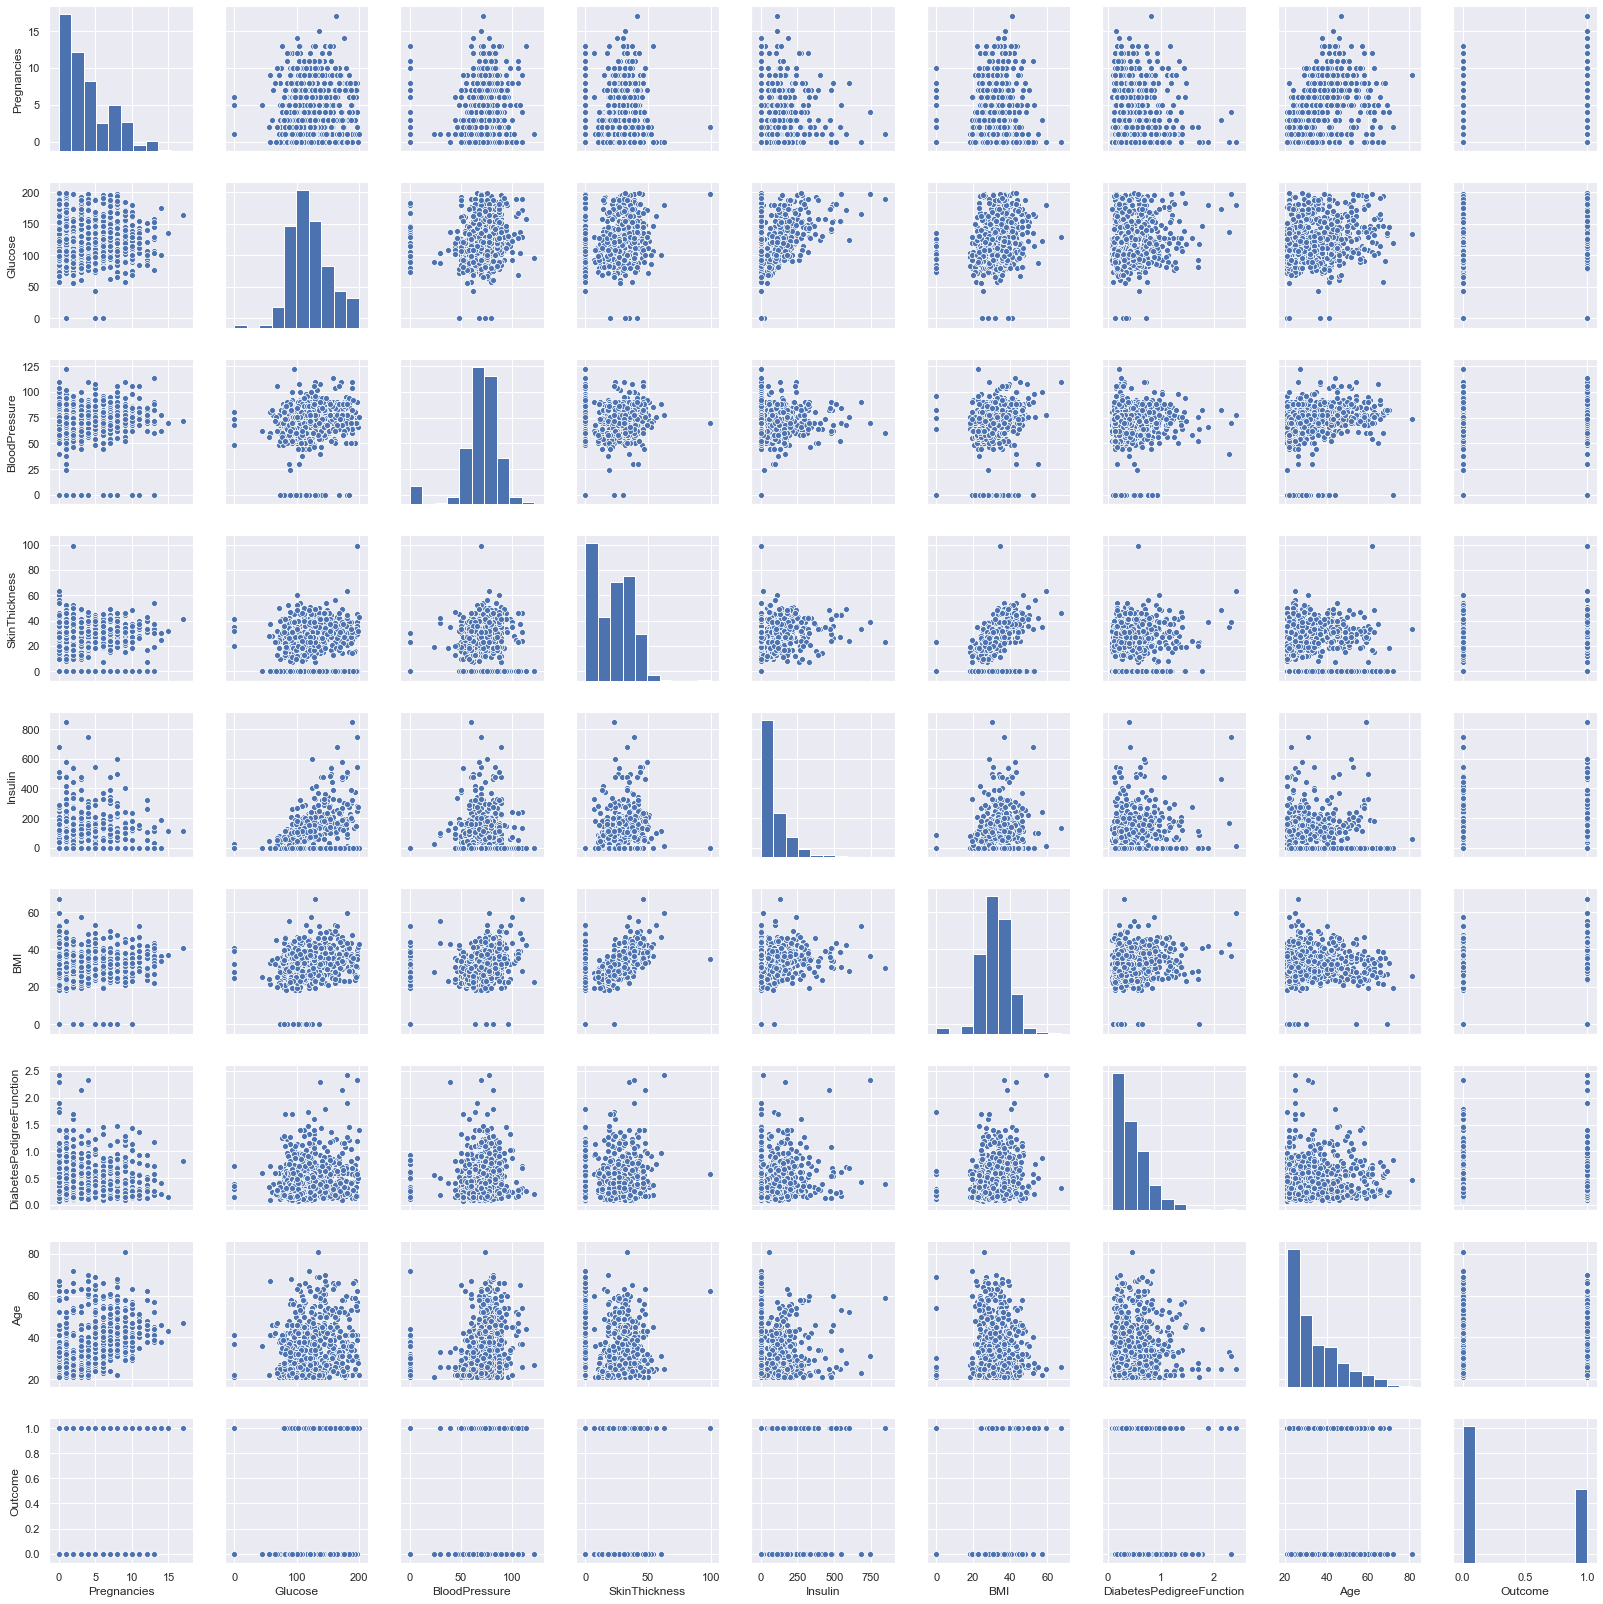

In [13]:
# create pairplots of all numeric factors in the dataset 
sns.pairplot(df, palette='colorblind')

+ Some of the attributes look normally distributed: **Glucose, Blood Pressure, BMI**. With the exception of the 0 values, **Skin Thickness** would have close to a normal distribution.  
+ **Age**: The age variable would be expected to have a normal distribution, but in this case, it skews toward younger ages instead of having a bell curved shape. 
+ Some of the attributes look like they might have an exponential distribution: **Pregnancies, Insulin, Diabetes Pedigree Function, Age**

## Correlation Between Numeric Variables

TODO: review standards for visualization colors that are colorblind friendly palettes.

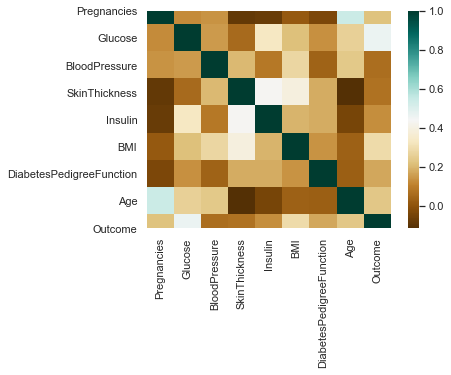

In [14]:
# create a correlation heatmap 
sns.heatmap(df.corr(), square=True, cmap='BrBG')

1 represents perfect positive correlation, and -1 represents perfect positive correlation. The correlation matrix above shows that factors with correlations of at least 0.4 are:
+ Age and number of pregnancies 
+ Insulin and Skin Thickness 
+ Glucose and outcome 

We can see that we are going to need to deal with the 0 values. Hopefully, missing values for features like pregnancy or the Diabetes Pedigree Funciton weren't encoded with 0's because it would be difficult to determine whether a person had 0 pregnancies, the pedigree funciton value is 0, or it was a missing value. 
<br>
The features with missing 0's that we need to address are: Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI. 

In [15]:
# start by turning 0's 
# in those columns into NaNs
df.Glucose.replace(0, np.nan, inplace=True)
df.BloodPressure.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(0, np.nan, inplace=True)
df.Insulin.replace(0, np.nan, inplace=True)
df.BMI.replace(0, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [16]:
# Count the number of NaNs in dataset 
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

For BMI, only 11 values are now marked as missing. Unfortunately, for Insulin, we are down to 394 non-null values. We might want to consider whether we should drop Insulin and SkinThicknss from our set of features because so many values are missing. 

One approach would be to drop every row with a missing value. 

In [17]:
# see what the impact would be 
# if we dropped every row that 
# had a missing value 
df_dropna = df
df_dropna = df.dropna()
df_dropna.shape

(392, 9)

If we used this approach, we would drop rom 768 rows to 392 rows. We would lose a large amount of data if we simply removed rows with a missing value.  

## Goals of Statistical Analysis with Missing Data 
+ Minimize bias
+ Maximize use of available information
+ Obtain appropriate estimates of uncertainty
https://stats.idre.ucla.edu/stata/seminars/mi_in_stata_pt1_new/

## Mean Imputation

Imputing means making an educated guess about what the missing values are. For example, using the mean of the non-missing values.

Let's see what would happen if we filled the missing values with the mean of that column. 

In [18]:
# fill each column 
# with the mean of that column 
df_fillna = df.fillna(df.mean())

In [19]:
# sanity check to make sure 
# we don't have missing values 
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [20]:
df_fillna.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# create pairplots of all numeric factors in the dataset 
sns.pairplot(df)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


From the scatterplot matrix, it looks like some features like glucose and insulin as well as skin thickness and bmi have linearity. We explore this further with a heatmap. 

In [ ]:
# create a correlation heatmap 
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In this matrix, green would show positive correlation while cells that are red show negative correlation. The correlation matrix dosn't show green values above 0.6 indicating strong correlation, but there are some yellow values above 0.4. 

In [ ]:
# Create arrays for the features and the response variable
y = df['Outcome'].values
X = df.drop('Outcome', axis=1).values

# K-Nearest Neighbor
Predict the label of a datapoint by looking at k-closest data points and taking a majority vote.
In sci-kit learn, all machine learning models are implemented as Python classes. The models implement that algorithms for learning and predicting. They also store the information learned from the data.

Note: to work with sci-kit learn, we need the following:
+ data as numpy array or pandas dataframe
+ numeric values instead of categorical values
+ no missing values in the data

## Train Test Split 

In [ ]:
# Split into training and test set
# Use 40% of the dataset for a test dataset
# random_state=42 makes it possible to replicate the split 
# and reproduce downstream results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

## Hyperparameter Tuning: Find a Value for K
Try out different values for k to choose a value that prevents overfitting or underfitting on the training dataset.
A larger k is a smoother decision boundary, a less complex model.
A smaller k is a more complex model. A smaller k can also lead to overfitting.

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
# Generate plot for the model complexity curve 
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Hyperparameter Tuning
+ **Linear Regression**: choosing parameters
+ **Ridge/lasso Regression**: choosing alpha
+ **K-nearest neighbors**: choosing n_neighbors
Parameters like alpha and k are hyperparameters. Hyperparameters cannot be learned by fitting the model. To choose the correct hyperparameter, try a bunch of different hyperparameter values and fit them separately, see how well each performs, and pick the best one. It is essential to use cross-validation because using train/test split alone risks overfitting to the test set. 

### Grid Search Cross-Validation 

In [ ]:
# dictionary where the keys are hyperparameter names
# the values are lists of values we want to tune hyperparameter on
param_grid = {'n_neighbors': np.arange(1, 50)}

In [ ]:
# instantiate classifier 
knn = KNeighborsClassifier()

In [ ]:
# pass in model, grid we want to tune on, 
# and number of folds for cross-validation
# this returns a grid search object 
knn_cv = GridSearchCV(knn, param_grid, cv=5)

In [ ]:
# fit the grid search object to the data
# this performs the actual grid search in place
knn_cv.fit(X, y)

In [ ]:
knn_cv.best_params_

In [ ]:
# mean cross validation over that fold
knn_cv.best_score_

## Classification Metrics

In [ ]:
# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

In [ ]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

In [ ]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [ ]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy of this classifier is 0.72, but accuracy isn't always an informative metric, especially when there is class imbalance in the dataset. <br>
For the confusion matrix, we can think of predicted values as columns and actual values as rows. In this case, not having diabetes happened to be the **positive class**. There are 176 ***true positives*** where it was predicted that the person didn't have diabetes and it was predicted that they didn't have diabetes. In 56 cases, there was a ***false negative*** where it was predicted that the person didn't have diabetes, and but they actually had diabetes. In 30 cases, there was a ***false positive*** where it was predicted that the person had diabetes, but they actually didn't have diabetes. In 46 cases, there was a ***true negative*** where it was predicted that the person had diabetes and they actually had diabetes. Overall, the classifier has 72% accuracy. 

+ **Precision** is the number of true positives / (true positive + false positive). This is the **positive predicted value** or PPV. The overall precision of 0.71 is fairly high. The classifier did a better job of predicting whether a woman had diabetes if she didn't have diabetes (the larger number of values in the dataset) than if she did have diabetes.  
+ **Recall** is the number of true positives / (true positives + false negatives). This is also called **sensitivity, hit rate, or true positive hit rate**. The average recall for the classifier is also 0.72 which is pretty high. However, the classifier was very strong at identifying people who didn't have diabetes, recall of 0.85, but it performed poorly on people on had diabetes, recall of 0.45. 
+ **F1-Score** is the harmonic mean of precision and recall. It is 2 * (precision * recall) / (precision + recall). In this case, the averae f1-score is 0.71. 
+ **Support** gives the number of samples of the true response that lie in that class. There are 206 people without diabetes and 102 people with diabetes (308 total values) in the test dataset.

Our goal is to predict what people have diabetes. Unfortunately this KNN Classifier has poor performance when it comes to people who have diabetes. 

## Logistic Regression 

By default, the logistic regression threshold is 0.5. This is not specific to logistic regression. k-NN classifiers also have thresholds. If the threshold was 0, the model would predict 1 for all of the data. Both the true positive and false positive rate would be equal to 1. When the threshold is 1, the model predicts 0 for all of the data. The true and false positive rates both equal 0. When we vary the thresholds between these points, we get various false and true positive values. The set of points we get when trying all possible thresholds is called the ROC curve. 

In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [ ]:
# Create the classifier: logreg
logreg = LogisticRegression()

In [ ]:
# Fit the classifier to the training data
logreg.fit(X_train, y_train)

In [ ]:
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

In [ ]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

We see some improvement compared to the K-NN model, particularly with the ability to classify people with diabetes. Given the importance of recognizing disease, we would hope to see further improvement on these metrics.

## ROC Curve

In [ ]:
# Compute predicted probabilities: y_pred_prob
# .predict_proba returns the probability of a sample 
# being in a particular class
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Area Under the ROC Curve (AUC) 
The larger the area under the ROC Curve, the better the model is. A really good model would have a point in the top left corner because the True Positive Rate would be 0 and the False Positive Rate would be 0. 

In [ ]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

## AUC Using Cross-Validation

If you have a binary classifier that is just randomly making guesses, it would be correct approximately 50% of the time. The resulting ROC curve would be a diagonal line where the True Positive Rate and False Positive Rate are equal. The area under this ROC curve would be 0.5. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign! 

In [ ]:
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_scores))

## Precision Recall Curve

The y-axis of the ROC Curve is the True Positive Rate (also called the Recall). Another visual way to evaluate model performance is the **precision recall curve** which is generated by plotting the precision and recall for different thresholds. 
+ A recall of 1 corresponds to a classifier with a low threshold in which all females with diabetes are classified as such, at the expense of many misclassifications of people who did not actually have diabetes. 
+ Precision is undefined for a classifier which makes no positive predictions, that is classifies everyone as not having diabetes. 
+ When the threshold is very close to 1, precision is also 1 because the classifier is very certain about its predictions. 
+ Precision and Recall do not take true negatives into consideration. Precision and Recall are primarily used when we are focused on positives. 

## Hyperparameter Tuning
+ **Linear Regression**: choosing parameters
+ **Ridge/lasso Regression**: choosing alpha
+ **K-nearest neighbors**: choosing n_neighbors
Parameters like alpha and k are hyperparameters. Hyperparameters cannot be learned by fitting the model. To choose the correct hyperparameter, try a bunch of different hyperparameter values and fit them separately, see how well each performs, and pick the best one. It is essential to use cross-validation because using train/test split alone risks overfitting to the test set. 

### Grid Search Cross-Validation 
Like the alpha parameter of lasso and ridge regression, logistic regression has regularization parameter C. C controls the inverse of the regularization strength. A large C can lead to an overfit model while a small C can lead to an underfit model. In practice, we indeed want to hold out a portion of the data for evaluation purposes. 

In [ ]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [ ]:
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

In [ ]:
# Fit it to the data
logreg_cv.fit(X,y)

In [ ]:
# Print the tuned parameters and score
# TODO: preprocess data so that this C value is smaller
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

## Decision Tree with Hyperparameter Tuning

In [ ]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [ ]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

In [ ]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

In [ ]:
# Fit it to the data
tree_cv.fit(X,y)

In [ ]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

## Hold-out Set for Final Evaluation

In [ ]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

In addition to C, logistic regressions has a penalty hyperparameter which specifies whether to use 'l1' or 'l2' regularization. 

In [ ]:
# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

In [ ]:
# Fit it to the training data
logreg_cv.fit(X_train, y_train)

In [ ]:
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

## Impute Missing Data
Imputing means making an educated guess about what the missing values are. For example, using the mean of the non-missing values. 

In [ ]:
# use Imputer filling missing values with the mean
# axis 0 refers to columns (axis 1 would be rows)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [ ]:
# Impute is a transformer
imp.fit(X)
X = imp.transform(X)

After transforming the data, we would then fit a supervised learning model to it. By using a pipeline, we can transform the data and fit a supervised learning model to it at the same time.

## Imputing within a Pipeline

In [ ]:
logreg = LogisticRegression()

In [ ]:
# each pipeline step is a two tuple 
# includes name we want to use and the estimator
steps = [('imputation', imp), ('logistic regression', logreg)]

In [ ]:
pipeline = Pipeline(steps)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# fit the pipeline on the training set
pipeline.fit(X_train, y_train)

In [ ]:
# predict on the test set
y_pred = pipeline.predict(X_test)

In [ ]:
# compute the accuracy
pipeline.score(X_test, y_test)

Note that in a pipeline, each step except for the last must be a transform. The last must be an estimator like a classifier, a regressor, or a transform.